<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Machine%20Learning/6_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Read DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDBDataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Delete Sentiment Column

In [ ]:
data = data.drop(columns=['sentiment'])

Make Clean Text

In [ ]:
def Cleantext(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

data['Cleanreview'] = data['review'].apply(Cleantext)

<ipython-input-35-b23caee4cd44>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


TF-IDF

In [ ]:
tfidf = TfidfVectorizer(max_features=25 , min_df=5, max_df=0.7, stop_words='english')
X_tfidf = tfidf.fit_transform(data['Cleanreview'])

Most Important Words

In [ ]:
Words = tfidf.get_feature_names_out()
print("\nمهمترین کلمات بر اساس TF-IDF:")
print(Words)


مهمترین کلمات بر اساس TF-IDF:
['acting' 'bad' 'best' 'character' 'characters' 'dont' 'film' 'films'
 'good' 'great' 'like' 'little' 'love' 'make' 'movie' 'movies' 'people'
 'plot' 'really' 'seen' 'story' 'think' 'time' 'watch' 'way']


Word2Vec

In [ ]:
tokenized_reviews = data['Cleanreview'].apply(word_tokenize)
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

Vectorised Text

In [ ]:
def get_sentence_vector(sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)
    else:
        return [0] * 100

sentence_vectors = tokenized_reviews.apply(get_sentence_vector)
data['vectorized_review'] = sentence_vectors

Save a CSV File

In [ ]:
data.to_csv("NewIMDBDataset.csv", index=False)

Visulization

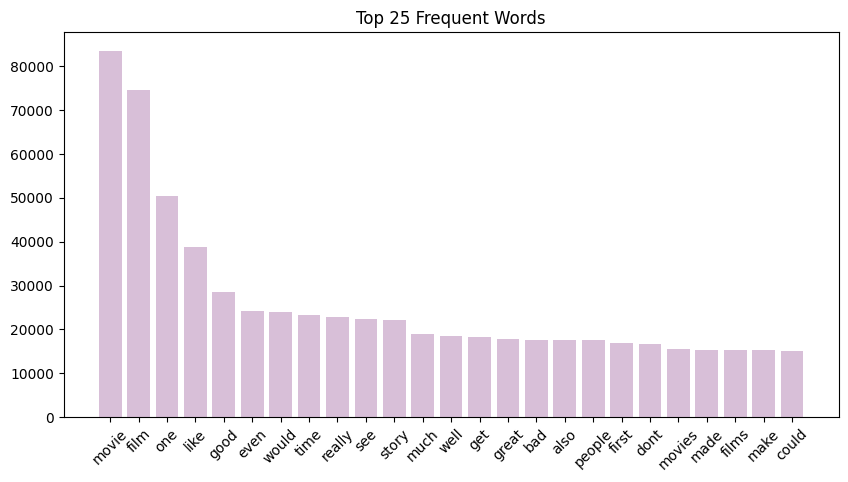

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

all_words = " ".join(data['Cleanreview']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(25)

words, freqs = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs, color='thistle')
plt.xticks(rotation=45)
plt.title("Top 25 Frequent Words")
plt.show()

In [ ]:
word = "movie"
if word in model.wv:
    similar_words = model.wv.most_similar(word, topn=10)
    print(f"کلمات مشابه '{word}':")
    for sim_word, similarity in similar_words:
        print(f"{sim_word}: {similarity}")
else:
    print(f"کلمه '{word}' در مدل یافت نشد.")

کلمات مشابه 'movie':
film: 0.8407108783721924
movies: 0.6741821765899658
moviei: 0.6702964901924133
flick: 0.6693780422210693
movieit: 0.6290626525878906
moviethe: 0.6250762939453125
filmit: 0.5806654095649719
filmi: 0.5529536008834839
itthe: 0.5436623096466064
moviebut: 0.5400168299674988


In [ ]:
word = "film"
if word in model.wv:
    similar_words = model.wv.most_similar(word, topn=10)
    print(f"کلمات مشابه '{word}':")
    for sim_word, similarity in similar_words:
        print(f"{sim_word}: {similarity}")
else:
    print(f"کلمه '{word}' در مدل یافت نشد.")

کلمات مشابه 'film':
movie: 0.8407109379768372
films: 0.6895964741706848
flick: 0.6356955170631409
filmthe: 0.6289923191070557
picture: 0.6047790050506592
movies: 0.596782386302948
movieit: 0.5826270580291748
cinema: 0.5821182131767273
documentary: 0.5817050933837891
filmit: 0.5653154253959656


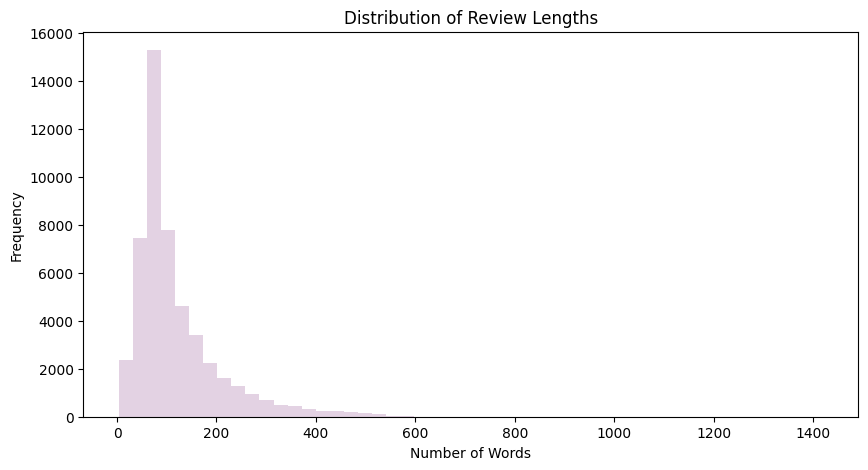

In [ ]:
data['review_length'] = data['Cleanreview'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
plt.hist(data['review_length'], bins=50, color='thistle', alpha=0.7)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()